In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [5]:
# checking the extra column in test data

cols = {}
uniqueCol = []
for col in test.columns:
    if col not in cols:
        cols[col] = 1
    else:
        cols += 1

for col in train.columns:
    if col not in cols:
        uniqueCol.append(col)
        
print(uniqueCol)

['SalePrice']


In [6]:
# dropping ID column as it has no effect on the sales price
# save the 'ID' column

train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

Skewness : 1.88
Kurtosis : 6.54


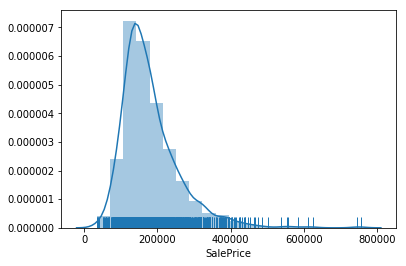

In [7]:
# looking at the normal distributuion of data to understand the nature of the data

sns.distplot(train['SalePrice'], bins = 20, rug = True)

print("Skewness : %0.2f" %train['SalePrice'].skew())
print("Kurtosis : %0.2f" %train['SalePrice'].kurt())

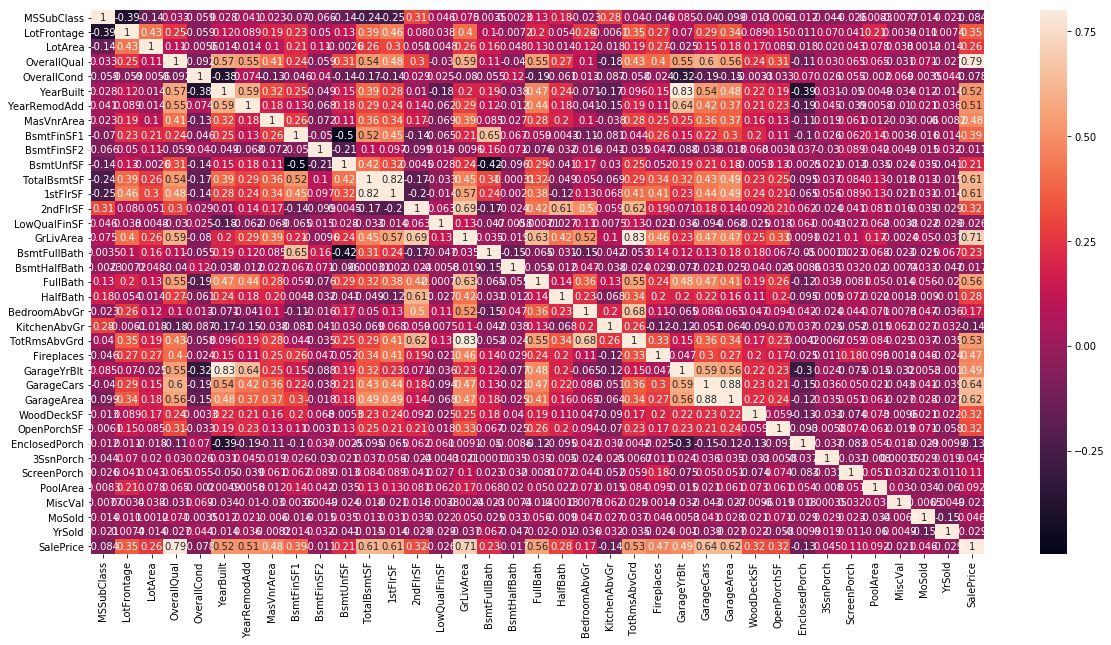

In [8]:
# now lets look at the correlated variables

corrmat = train.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corrmat, vmax = .8, annot = True);

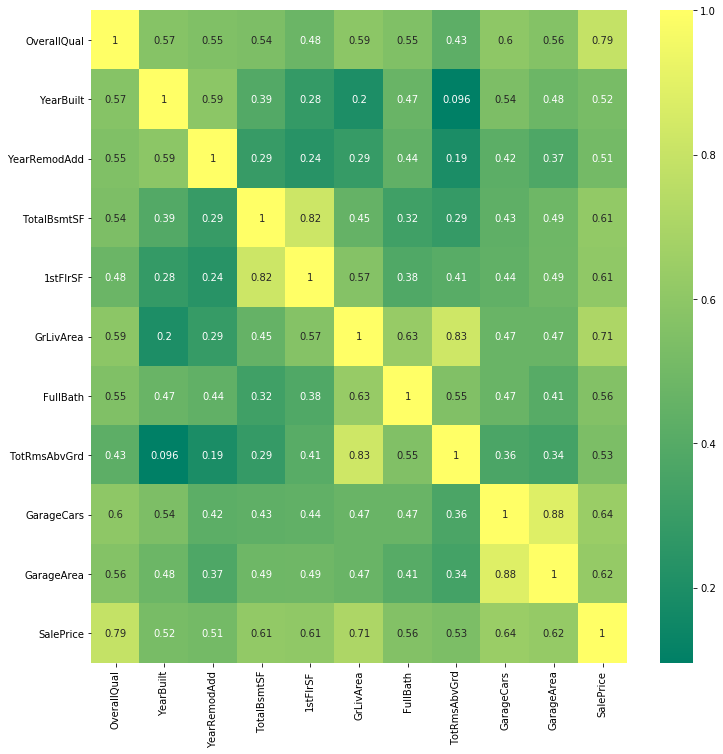

In [9]:
# to look at the graph more clearly  we will filter correlation greater than 0.5

corrmat = train.corr()

filterCorrMat = corrmat.index[abs(corrmat['SalePrice']) >= 0.5]
plt.figure(figsize=(12,12))

sns.heatmap(train[filterCorrMat].corr(), annot = True, cmap = 'summer')

/home/saviour/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


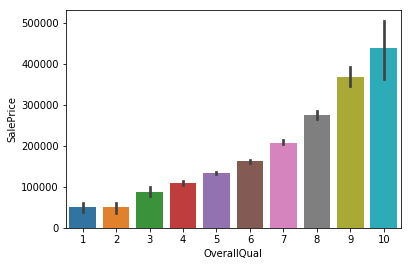

In [10]:
# OverallQual and GrLivArea are highly correlated with SalesPrice

sns.barplot(train.OverallQual, train.SalePrice)

In [11]:
n_train = train.shape[0]
n_test = test.shape[0]

y_train = train.SalePrice.values

all_data = pd.concat((train, test)).reset_index(drop = True)
all_data.drop(['SalePrice'], axis = 1, inplace = True)

print("all data size is : {}".format(all_data.shape))

all data size is : (2919, 79)


/home/saviour/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [12]:
#counting the total missing values in all columns

total_missing = all_data.isnull().sum().sort_values(ascending = False)

percentage = ((all_data.isnull().sum()/all_data.isnull().count())*100).sort_values(ascending = False)

missing_data = pd.concat([total_missing,percentage], axis = 1, keys = ['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageFinish,159,5.447071
GarageQual,159,5.447071
GarageYrBlt,159,5.447071
GarageCond,159,5.447071


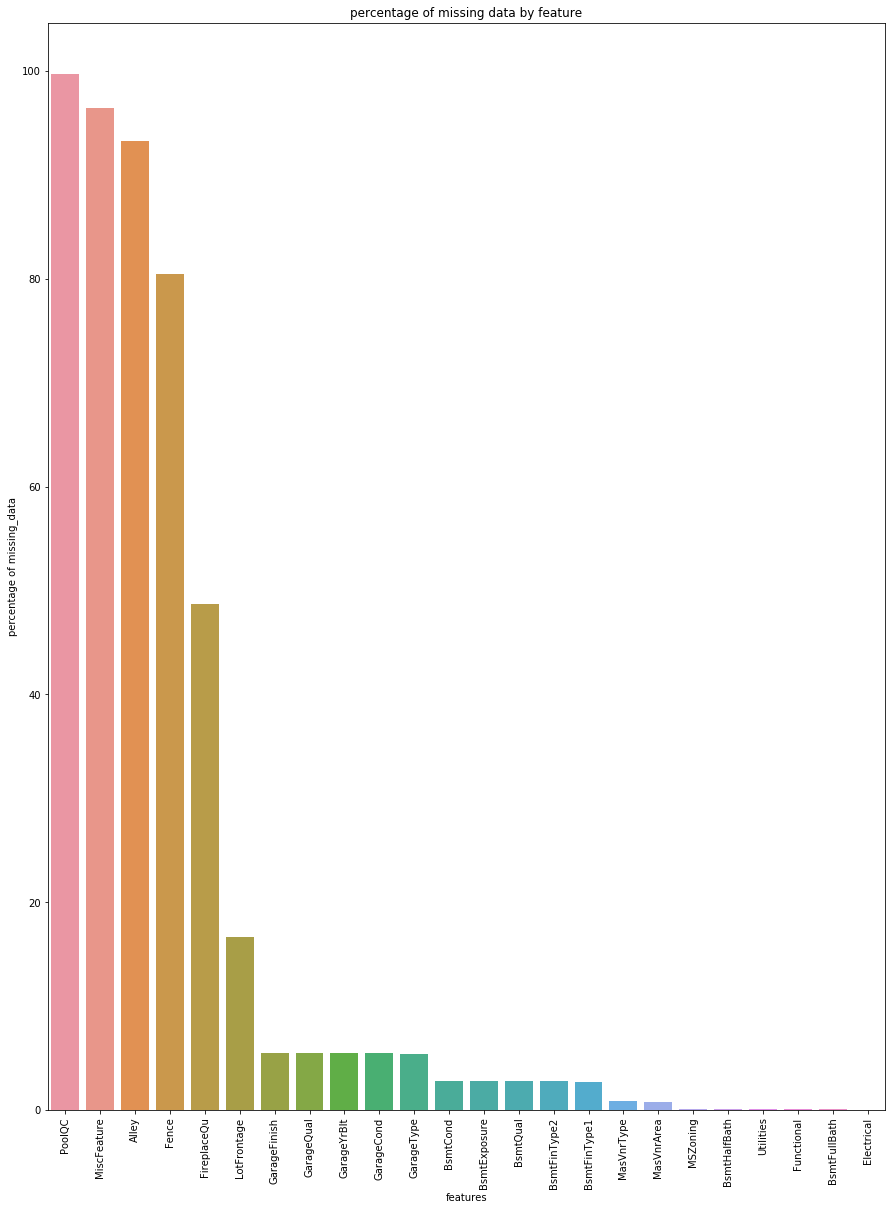

In [13]:
plt.figure(figsize=(15,20))
plt.xticks(rotation = '90')
sns.barplot(x = total_missing.index[:24], y = percentage[:24])
plt.xlabel('features')
plt.ylabel('percentage of missing_data')
plt.title('percentage of missing data by feature')
plt.show()

In [14]:
#dropping features that have more than 50% of missing data

column_drop = missing_data[missing_data['Percentage'] > 50].index

all_data = all_data.drop(column_drop, axis = 1)
print(all_data.shape)

(2919, 75)


In [15]:
# replacing missing data with none
#For all categorical basement -related feature NaN measn there is no basement

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 
            'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 
            'BsmtHalfBath', 'GarageType', 'GarageFinish', 
            'GarageQual', 'BsmtUnfSF', 'BsmtFinSF1', 
            'BsmtFinSF2', 'GarageCond', 'FireplaceQu', 
            'MasVnrType', 'Exterior2nd'):
    if col in all_data.columns:
        all_data[col] = all_data[col].fillna('None')

In [16]:
# taking care of the missing data for numerical feature

#GarageYrBlt replace missing data with 0
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0)

#Na measn there was no masonary venner for the house, therefore filling it with 0
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)

#No correlation with SalesPrice and therefore dropping it
all_data = all_data.drop('YrSold', axis = 1)

#setting the most occuring value 'SBrkr' and 'RL'
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

#feature utility wont help in predicting Sales
all_data = all_data.drop(['Utilities'], axis = 1)

all_data['Functional'] = all_data['Functional'].fillna('Typ')

all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [17]:
# checking if there are any missing values

all_data.isnull().sum().sort_values(ascending = False)

KitchenQual      1
TotalBsmtSF      1
GarageCars       1
GarageArea       1
SaleType         1
Exterior1st      1
Fireplaces       0
EnclosedPorch    0
ExterCond        0
ExterQual        0
Exterior2nd      0
FireplaceQu      0
YearRemodAdd     0
Foundation       0
Condition2       0
FullBath         0
Functional       0
GarageCond       0
GarageFinish     0
Electrical       0
Condition1       0
GarageType       0
BsmtFinSF1       0
2ndFlrSF         0
3SsnPorch        0
BedroomAbvGr     0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinSF2       0
                ..
OpenPorchSF      0
OverallCond      0
OverallQual      0
PavedDrive       0
RoofMatl         0
YearBuilt        0
RoofStyle        0
SaleCondition    0
ScreenPorch      0
Street           0
TotRmsAbvGrd     0
WoodDeckSF       0
MiscVal          0
MasVnrType       0
MasVnrArea       0
MSZoning         0
MSSubClass       0
LowQualFinSF     0
LotShape         0
LotFrontage      0
LotConfig        0
LotArea     

In [18]:
#dropping the remaining missing values
all_data = all_data.dropna()

all_data.isnull().sum().sort_values(ascending = False)

YearRemodAdd     0
GarageYrBlt      0
EnclosedPorch    0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
FireplaceQu      0
Fireplaces       0
Foundation       0
FullBath         0
Functional       0
GarageArea       0
GarageCars       0
GarageCond       0
GarageFinish     0
GarageQual       0
Electrical       0
Condition2       0
Condition1       0
BsmtFinSF1       0
2ndFlrSF         0
3SsnPorch        0
BedroomAbvGr     0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinSF2       0
CentralAir       0
BsmtFinType1     0
                ..
PavedDrive       0
PoolArea         0
RoofMatl         0
RoofStyle        0
SaleCondition    0
SaleType         0
ScreenPorch      0
Street           0
TotRmsAbvGrd     0
TotalBsmtSF      0
WoodDeckSF       0
MoSold           0
MiscVal          0
MasVnrType       0
LandSlope        0
Heating          0
HeatingQC        0
HouseStyle       0
KitchenAbvGr     0
KitchenQual      0
LandContour      0
LotArea     

In [19]:
# checking for outliers

from pandas.api.types import is_numeric_dtype

def remove_out (df):
    low = .05
    high = .9
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
        return df
remove_out(all_data).head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
0,856,854,0,3,1Fam,TA,No,706,0,GLQ,...,Gable,Normal,WD,0,Pave,8,856.0,0,2003,2003
1,1262,0,0,3,1Fam,TA,Gd,978,0,ALQ,...,Gable,Normal,WD,0,Pave,6,1262.0,298,1976,1976
2,920,866,0,3,1Fam,TA,Mn,486,0,GLQ,...,Gable,Normal,WD,0,Pave,6,920.0,0,2001,2002
3,961,756,0,3,1Fam,Gd,No,216,0,ALQ,...,Gable,Abnorml,WD,0,Pave,7,756.0,0,1915,1970
4,1145,1053,0,4,1Fam,TA,Av,655,0,GLQ,...,Gable,Normal,WD,0,Pave,9,1145.0,192,2000,2000


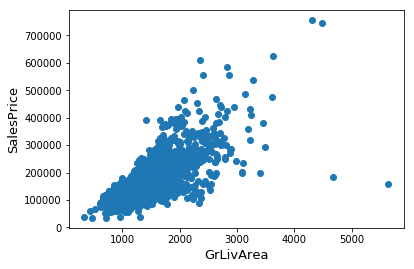

In [20]:
plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalesPrice', fontsize = 13)
plt.xlabel('GrLivArea', fontsize = 13)
plt.show()

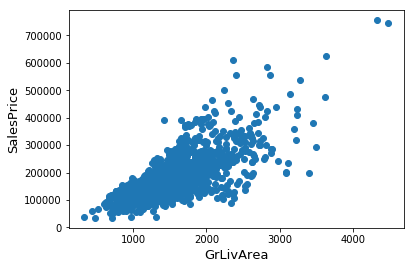

In [21]:
# Deleting outliers

tempTrain = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

plt.scatter(x = tempTrain['GrLivArea'], y = tempTrain['SalePrice'])
plt.ylabel('SalesPrice', fontsize = 13)
plt.xlabel('GrLivArea', fontsize = 13)
plt.show()

In [22]:
from scipy import stats
from scipy.stats import norm

/home/saviour/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 180921.20 and sigma = 79415.29



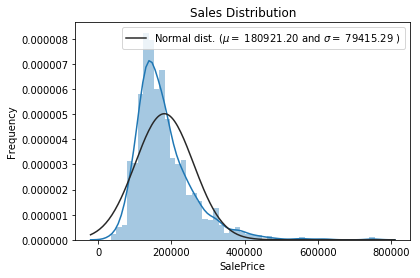

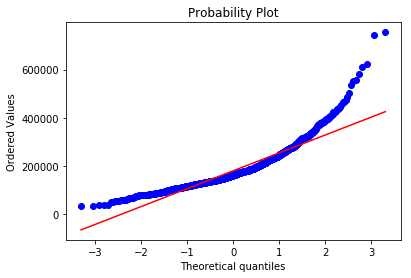

In [23]:
sns.distplot(train['SalePrice'], fit = norm)

(mu, sigma) = norm.fit(train['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma = $ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('Sales Distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot = plt)

plt.show()

/home/saviour/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 12.02 and sigma = 0.40



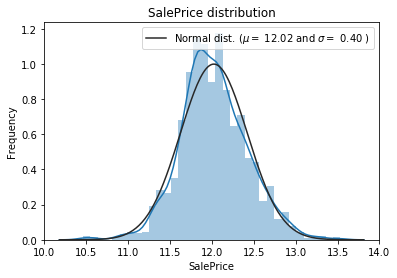

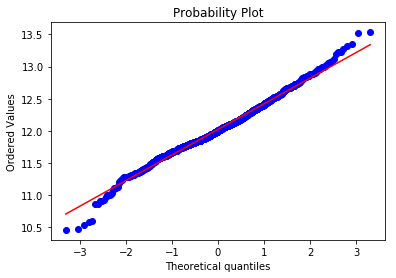

In [24]:
#applying log(1_x) to all elements od 'SalePrice'

y_train = train['SalePrice'] = np.log1p(train['SalePrice'])

#check the new distribution
sns.distplot(train['SalePrice'], fit = norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [25]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [26]:
from scipy.stats import skew 

# extracting numerical features
numeric_features = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
numeric_features = all_data[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :numeric_features})
skewness.head(10)

print(all_data.shape)


Skew in numerical features: 

(2914, 74)


In [27]:
highly_skewed = ['PoolArea','LotArea','KitchenAbvGr','ScreenPorch']

from scipy.special import boxcox1p
lam = 0.15
for feat in highly_skewed:
    all_data[feat] = boxcox1p(all_data[feat], lam)

In [28]:
all_data = pd.get_dummies(all_data)

In [29]:
train = all_data[:n_train]
test = all_data[n_train:]

print(train.shape, test.shape)

(1460, 2683) (1454, 2683)


In [30]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer 
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from xgboost import XGBRegressor

In [31]:
print(y_train.shape, train.shape)

(1460,) (1460, 2683)


In [32]:
X_train,X_test,y_train2,y_test = train_test_split(train.values,y_train,test_size = 0.3,random_state= 0)
X_train.shape,X_test.shape,y_train2.shape,y_test.shape

((1022, 2683), (438, 2683), (1022,), (438,))

In [33]:
# Scoring - Root Mean Squared Error
def rmse_CVscore(model,X,y):
    return np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))

In [34]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.05, random_state=1))

score = rmse_CVscore(lasso,X_train,y_train2)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1916 (0.0199)



In [35]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.05, l1_ratio=.9, random_state=3))

score = rmse_CVscore(ENet,X_train,y_train2)
print("\nElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


ElasticNet score: 0.1865 (0.0197)



In [36]:
GBoost = GradientBoostingRegressor(n_estimators=1000,max_depth=4,
                                   learning_rate=0.05,
                                   max_features='sqrt',
                                   loss="huber",random_state =5)
score = rmse_CVscore(GBoost,X_train,y_train2)
print("\nGradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Gradient Boosting score: 0.1327 (0.0204)



In [37]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=1000)

score = rmse_CVscore(model_lgb, X_train, y_train2)
print("\nLightGBM Regressor score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


LightGBM Regressor score: 0.1377 (0.0132)



In [38]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # creating clones of the original models
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # fitting our data to the models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #making predictions on our fitted models and averaging them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [39]:
averaged_models = AveragingModels(models = (ENet,GBoost, lasso, model_lgb))

score = rmse_CVscore(averaged_models,X_train, y_train2)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1459 (0.0198)



In [45]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

# train=train.drop(train.index[[0,4]],axis=0)
print("test shape: {}, train shape: {}".format(test.shape, y_train.shape))

averaged_models.fit(train, y_train)
train_pred = averaged_models.predict(train)
avg_pred = np.expm1(averaged_models.predict(test))
                          
print(rmse(y_train, train_pred))



test shape: (1454, 2683), train shape: (1460,)
0.11419182055997484


array([128467.98974279, 161903.11666832, 169837.74803106, ...,
       159267.76840936, 112728.91834301, 208521.60923657])

In [41]:
# test['Id'].shape
# avg_pred.shape
sub = pd.DataFrame()
sub['SalePrice'] = avg_pred
sub['Id'] = train_ID
sub.to_csv('submission.csv',index=False)